### Student Information
Name: Samuel Montes Jr

Student ID: 114065429

GitHub ID: samjun99

---

# Phase 1

## 1. Code Setup and Data Preparation

Similar to the Master exercises, we used the similar code setup for this part.

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable)
print(sys.version)

import pandas as pd

data = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


D:\NTHU\Data_mining\Lab_2_v2_working\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [2]:
# print the first five records of the dataset to check
print(data.head())

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

## 1.1 Checking for Missing Values (From Exercise 4)

Here, we checked if there's anthing missing values from the data. We can also check the attributes associated to the dataset to see which attributes we can keep for the rest of the exercises.

In [3]:
# check missing values
data.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [4]:
# Here we try to check the total number of missing values per column

import helpers.data_mining_helpers as dmh

data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [5]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In checking the attributes for missing values, it can be seen that both `downvotes` and `upvote_ratio` has majority of its missing values. In my assumption, a valid reason for this could just mean that theres no vote for that particular record whenever we encounter a missing value.

In this data, I find that the following attributes: `type`, `subreddit`, `title`, `text`, and `label` is much more meaningful and therefore will be used for the suceeding exercises.

In [6]:
data = data[["type", "subreddit", "title", "text", "label"]]

## 2. Category Distribution (From Exercises 7 & 8)

In this part, we will try to check the distribution of the dataset. But first, we will need to determine the attribute which will be used for showing the distribution.

We will first plot the distribution of the `subreddit` attribute. We added the count labels on the top of the bars for easier checking.

In [7]:
subreddit_counts = data["subreddit"].value_counts()

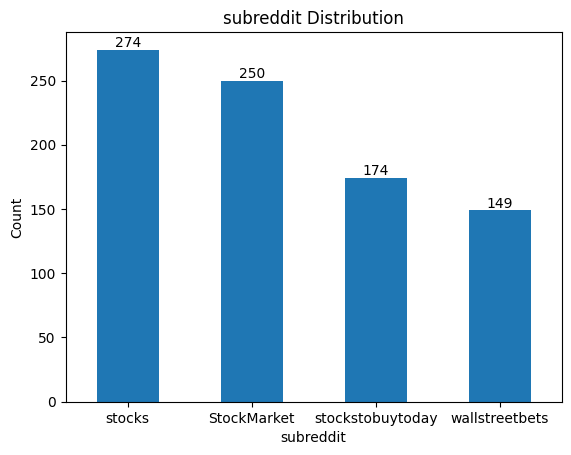

In [8]:
import matplotlib.pyplot as plt

# Plot as bar chart
axes = subreddit_counts.plot(kind="bar", title="subreddit Distribution", rot=0)

plt.xlabel("subreddit")
plt.ylabel("Count")

for container in axes.containers:
    axes.bar_label(container)
    
plt.show()

Now, we will try to plot the distribution of other attributes. We have chosen `type` and `labels` in this case since they are the ones that shares the same values on all records.

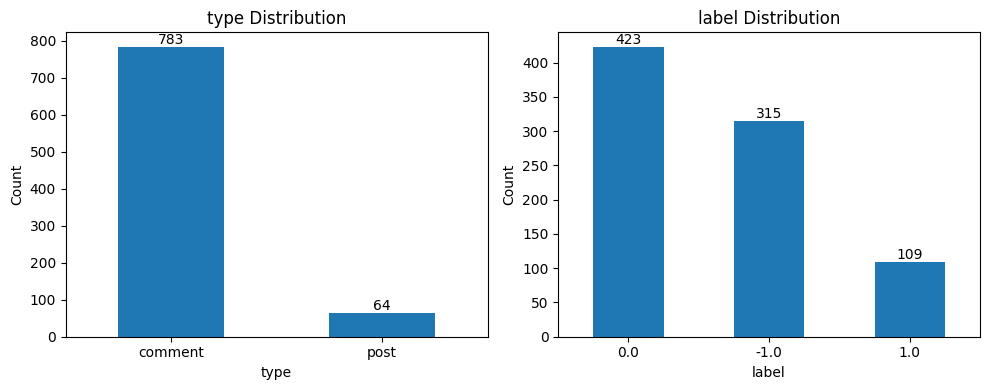

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

data['type'].value_counts().plot(kind='bar', ax=axes[0], title="type Distribution", rot=0)
axes[0].set_xlabel("type")
axes[0].set_ylabel("Count")

for container in axes[0].containers:
    axes[0].bar_label(container)

data['label'].value_counts().plot(kind='bar', ax=axes[1], title="label Distribution", rot=0)
axes[1].set_xlabel("label")
axes[1].set_ylabel("Count")

for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

### 2.1 With sampling

In this part we will try to do a sampling of the data and check its distribution along with its original data side-by-side. A sampling number of 300 will be used in this case.

In [10]:
data_sample = data.sample(n=300)

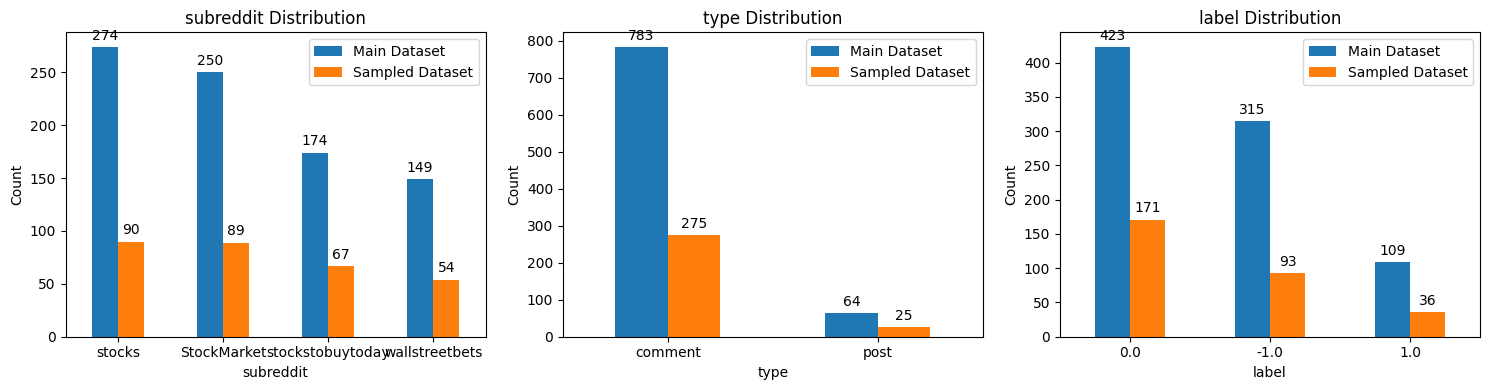

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# First subplot
df1 = pd.DataFrame({
    "Main Dataset": data["subreddit"].value_counts(),
    "Sampled Dataset": data_sample["subreddit"].value_counts()
}).fillna(0).astype(int)

df1.plot(kind='bar', ax=axes[0], title="subreddit Distribution", rot=0)
axes[0].set_xlabel("subreddit")
axes[0].set_ylabel("Count")

for container in axes[0].containers:
    axes[0].bar_label(container, padding=3)

# Second subplot
df2 = pd.DataFrame({
    "Main Dataset": data["type"].value_counts(),
    "Sampled Dataset": data_sample["type"].value_counts()
}).fillna(0).astype(int)

df2.plot(kind='bar', ax=axes[1], title="type Distribution", rot=0)
axes[1].set_xlabel("type")
axes[1].set_ylabel("Count")

for container in axes[1].containers:
    axes[1].bar_label(container, padding=3)

# Third subplot
df3 = pd.DataFrame({
    "Main Dataset": data["label"].value_counts(),
    "Sampled Dataset": data_sample["label"].value_counts()
}).fillna(0).astype(int)

df3.plot(kind='bar', ax=axes[2], title="label Distribution", rot=0)
axes[2].set_xlabel("label")
axes[2].set_ylabel("Count")

for container in axes[2].containers:
    axes[2].bar_label(container, padding=3)

plt.tight_layout()
plt.show()

In this code, we can observe that the pattern of the distribution remains the same even with the sampling method.

## 3. Feature Creation

In this section, we will now try to split the text of all the records into an array of tokens and we will try to visualize them

In [12]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
# obtain unigrams for each text and add to the dataset

data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text)

In [15]:
data_counts.shape

(847, 4346)

In [16]:
analyze = count_vect.build_analyzer()
analyze(data.text[0])

['calls', 'on', 'retards']

In [17]:
# plot first twenty features only for checking
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In this part, we will now try to recreate the plot using `seaborn` and in the sucessive parts, we will try to recreate other ways to visualize them.

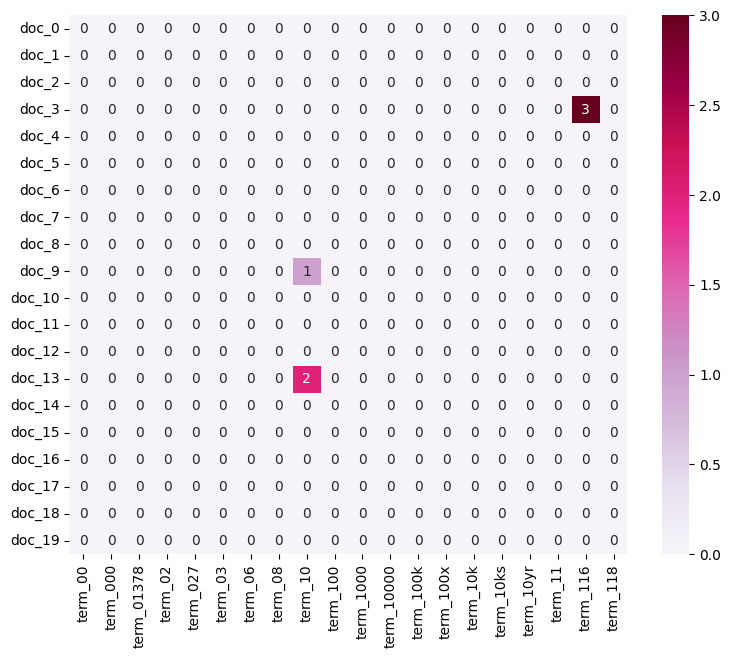

In [18]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=True)

I tried to plot using the new dataset using the style from `exercise 11` in the master file.

<Axes: >

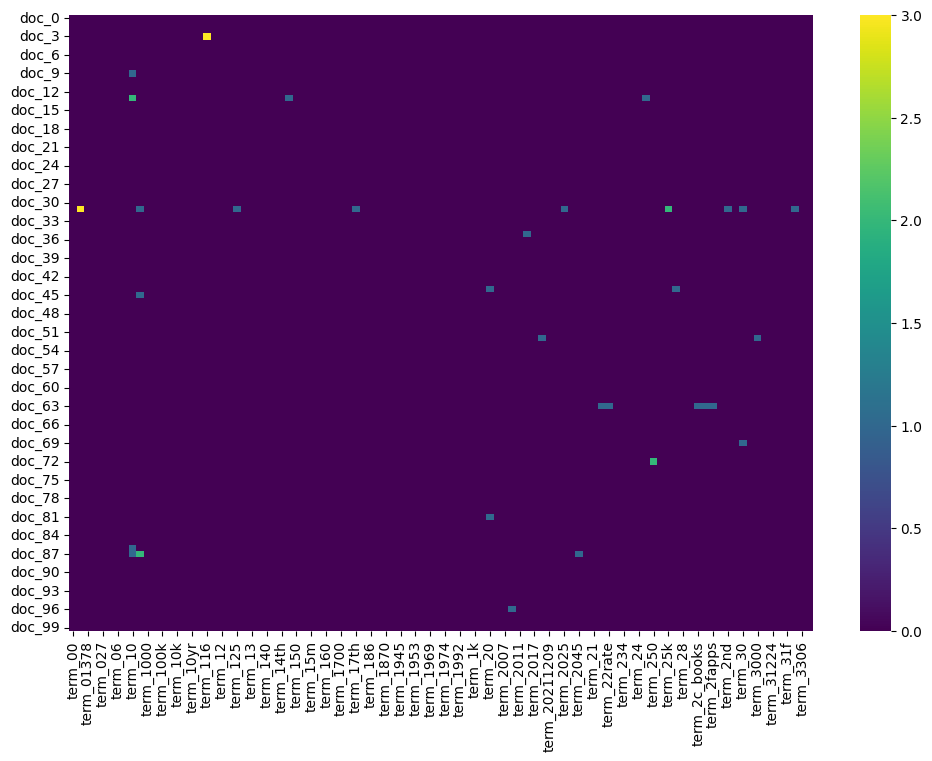

In [19]:
term_len = 100
doc_len = 100

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:term_len]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:doc_len]]
plot_z = data_counts[0:doc_len, 0:term_len].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="viridis", cbar=True)

## 4. Other ways to visualize

In this section, we will now try to use other ways to visualize the tokenized text to see how they appear frequently.

### 4.1 Word Cloud

A word cloud tell us how frequent a term is being used by lokking its font size, the larger the text, the more frequent it is.

In [20]:
from wordcloud import WordCloud
text = ' '.join(data['text']) 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Text Data")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

### 4.2 Frequency chart

The frequency chart shows us the top words being used using bar chart.

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\1833368691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_terms, x='term', y='count', palette='viridis')


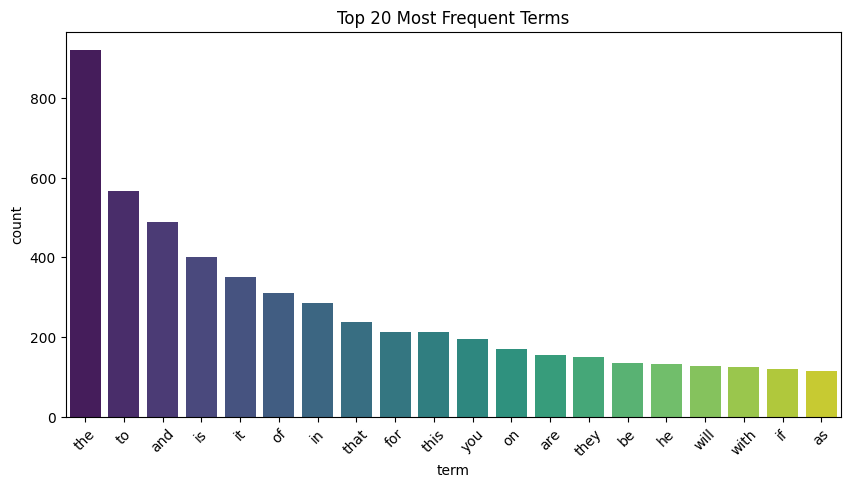

In [21]:
term_freq = np.array(data_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()
term_df = pd.DataFrame({'term': terms, 'count': term_freq})
top_terms = term_df.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10,5))
sns.barplot(data=top_terms, x='term', y='count', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Terms")
plt.show()


### 4.3 PCA Scatter Plot

This plot shows the documents projected into two dimensions using **Principal Component Analysis (PCA)**.  
Each point represents one document, and the position is determined by patterns in the words used.  

- **X-axis (PC1)** shows the direction of greatest variation in the dataset.  
- **Y-axis (PC2)** shows the second most significant pattern, uncorrelated with the first.
- 
Documents that appear **close together** have **similar word usage**, while those **far apart** differ more in their content.

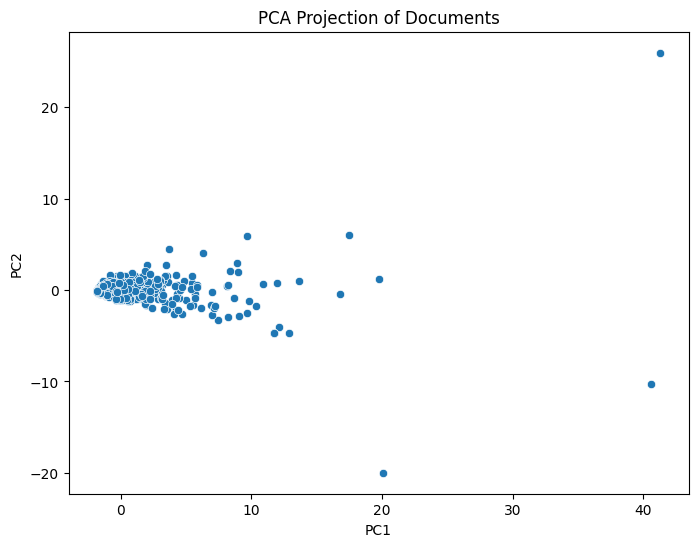

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_counts.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1])
plt.title("PCA Projection of Documents")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## 5. Transform Text Data

In this part, we will extract the word frequency of the `text` field in the dataset. Similar to the one we just showed in the plot of the most frequently used words but with more terms.

In [23]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

For easier readability, we will only show up to 300 terms.

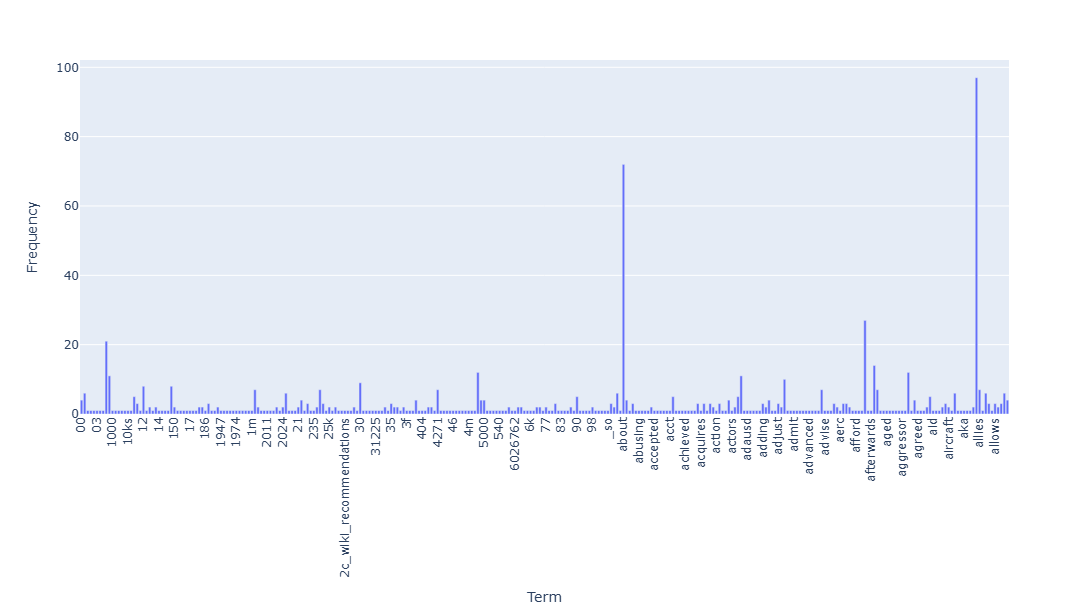

In [24]:
import plotly.express as px

# instead of seaborn barplot
fig = px.bar(x=count_vect.get_feature_names_out()[:300],
             y=term_frequencies[:300],
             labels={"x": "Term", "y": "Frequency"})

# rotate labels for readability
fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()

We will now then sort the terms to see its behavior.

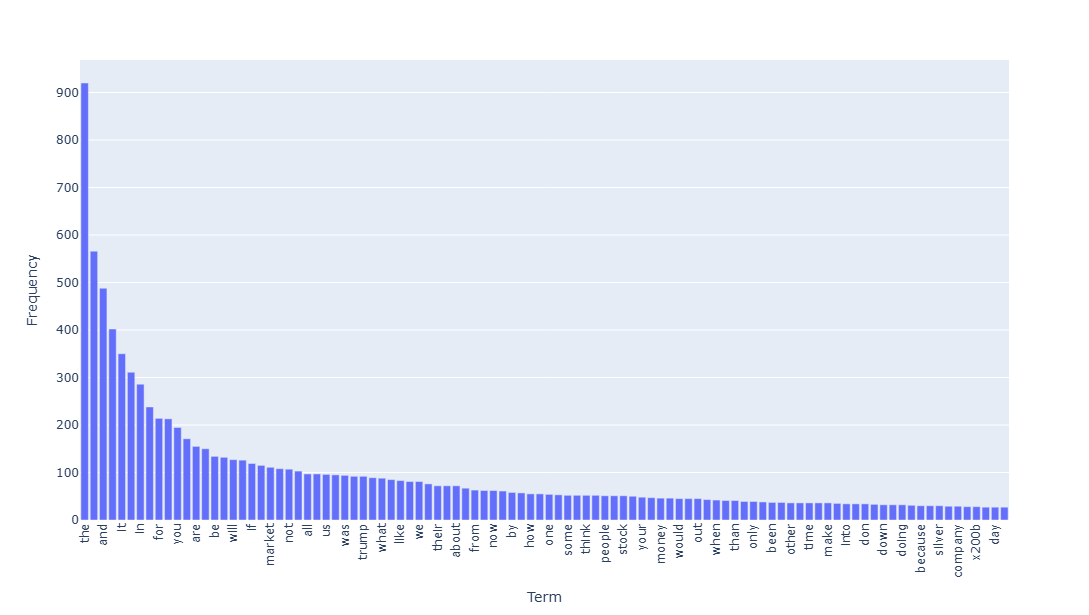

In [25]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
})

# sort by frequency (descending)
df_terms = df_terms.sort_values("frequency", ascending=False)
df_terms_sorted = df_terms[:100]

# plot sorted bar chart
fig = px.bar(df_terms_sorted,
             x="term",
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()

### 5.1 Transform into log scale

We will now transform the data into log scale for more easier readability.

In [26]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\1137108418.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



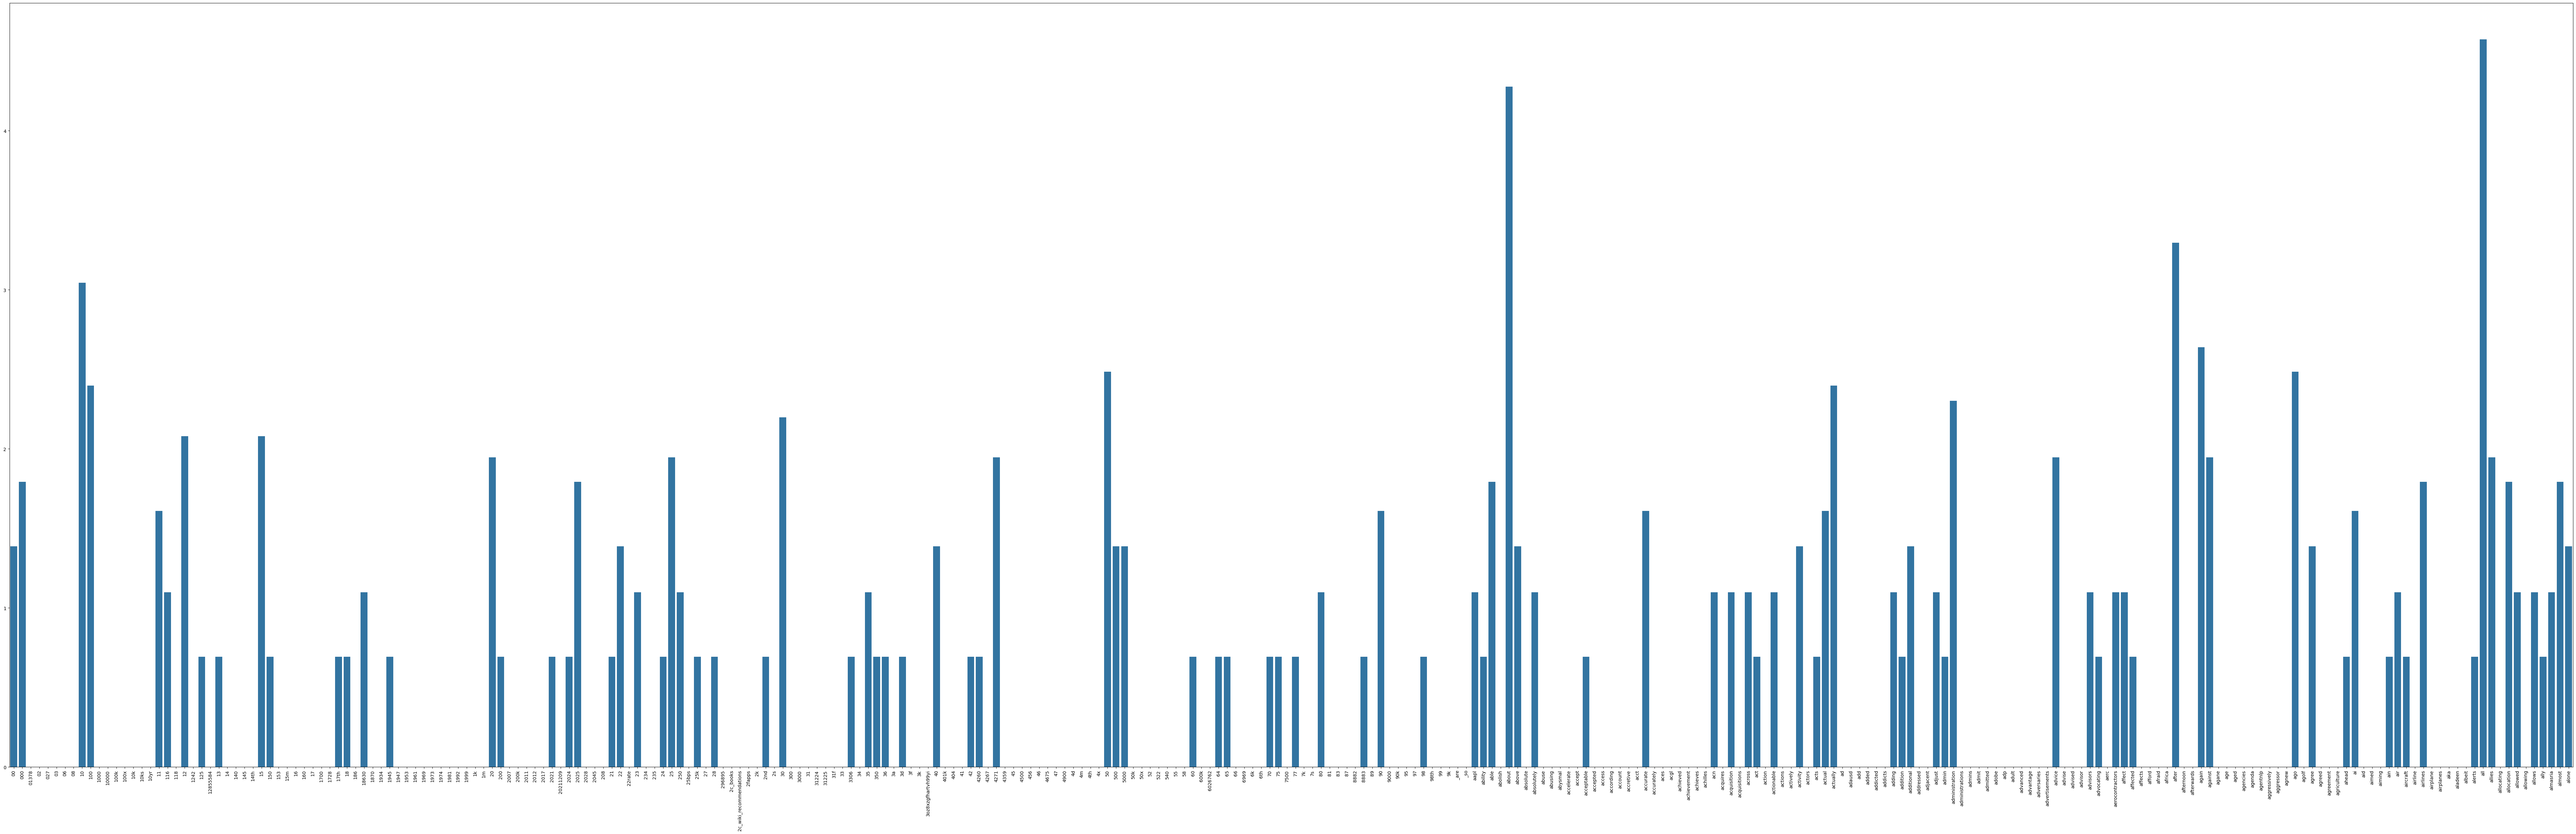

In [27]:
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Next, we will sort them

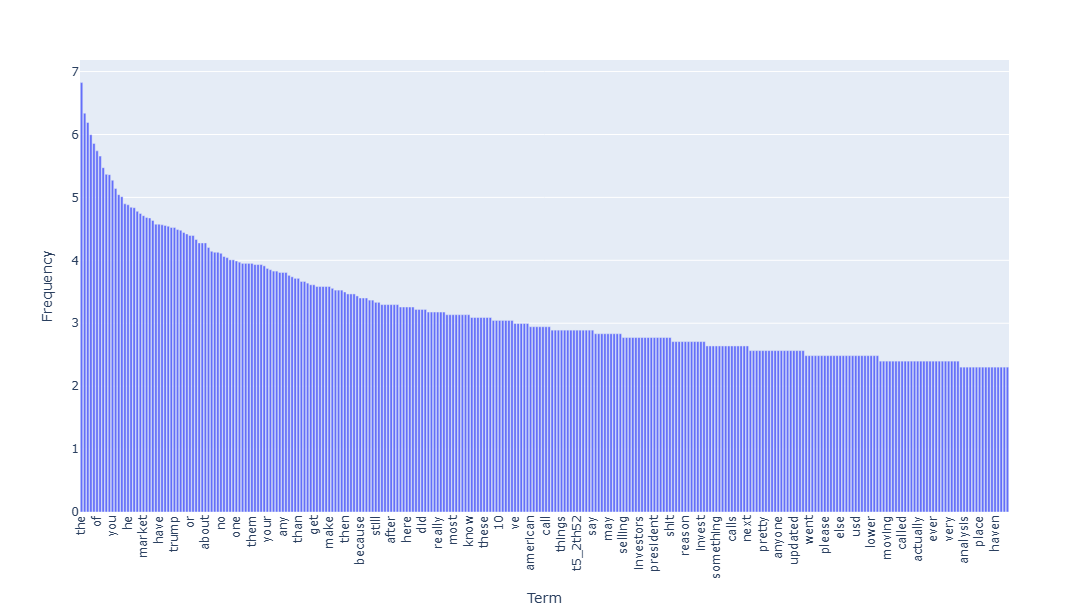

In [28]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies_log
})

# sort by frequency (descending)
df_terms = df_terms.sort_values("frequency", ascending=False)
df_terms_sorted = df_terms[:300]

# plot sorted bar chart
fig = px.bar(df_terms_sorted,
             x="term",
             y="frequency",
             labels={"term": "Term", "frequency": "Frequency"})

fig.update_layout(xaxis_tickangle=-90, height=600, width=1200)
fig.show()

# Phase 2

###  5.4.2 Finding frequent patterns

For the phase 2 I reload the new dataset just to make sure that were using the one from the CSV

In [33]:
data = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
data = data[["type", "subreddit", "title", "text", "sentiment"]]

Filtering the dataset into sentiment categories `-1`, `0`, and `1` 

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiment = data['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for i in sentiment:
    sentiment_dfs[i] = data[data['sentiment'] == i].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    data_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out() #creates an array of words
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(data_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for i in sentiment:
    filt_term_document_dfs[i] = create_term_document_df(sentiment_dfs[i])

In [43]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_number]}:")
filt_term_document_dfs[sentiment[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Category 1.0:


,00,000,06,08,10,100,1000,10000,10k,10ks,...,you,young,your,yours,yourself,yoyo,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plot the Term Frequency for sentiment value `-1`

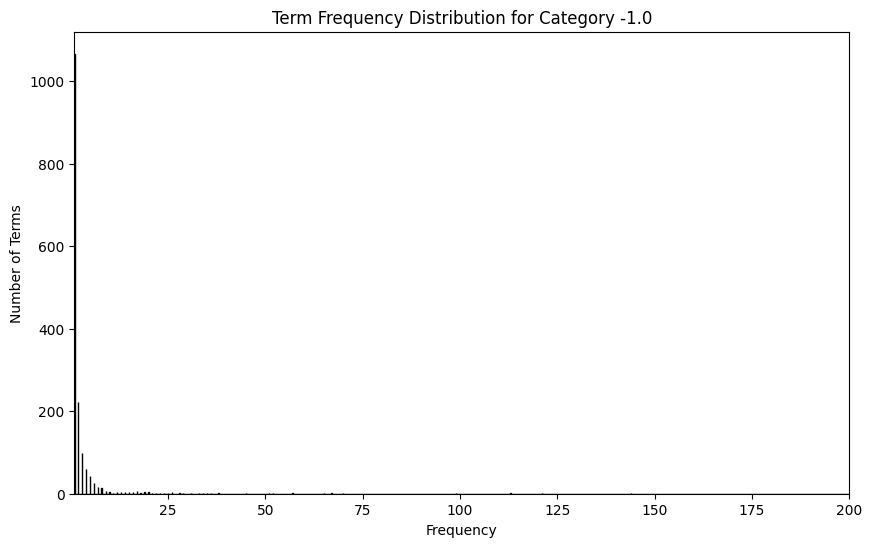

In [53]:
 # Sum over all documents to get total frequency for each word
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiment[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiment[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

Removing the upper **5 percent**

In [61]:
sentiment_number=list(range(3)) #You can change it from 0 to 2

for x in sentiment_number:
    word_counts = filt_term_document_dfs[sentiment[x]].sum(axis=0).to_numpy()
    
    # Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies | get indices of frequencies to be sorted
    sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order | actual sorted frequencies
    
    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)
    
    # Get the indices of the top 5% most frequent terms
    top_5_percent_indices = sorted_indices[:top_5_percent_index]
    
    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [filt_term_document_dfs[sentiment[x]].iloc[:, i].name for i in top_5_percent_indices] # array containing the top 5 percent most frequent words
    
    print(f"Category: {sentiment[x]}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Filtered terms: {filtered_words}")


Category: -1.0
Number of terms in top 5%: 81
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'you', 'for', 'he', 'are', 'trump', 'if', 'they', 'so', 'on', 'be', 'will', 'but', 'as', 'just', 'not', 'us', 'with', 'can', 'what', 'have', 'like', 'at', 'all', 'his', 'was', 'think', 'about', 'my', 'or', 'now', 'people', 'an', 'even', 're', 'their', 'we', 'when', 'bad', 'going', 'china', 'has', 'tariffs', 'more', 'no', 'fuck', 'from', 'market', 'him', 'than', 'money', 'up', 'see', 'there', 'do', 'how', 'by', 'silver', 'out', 'one', 'only', 'go', 'why', 'down', 'still', 'me', 'long', 'shit', 'economy', 'want', 'some', 'make', 'too']
Category: 1.0
Number of terms in top 5%: 156
Filtered terms: ['the', 'to', 'and', 'is', 'of', 'it', 'in', 'that', 'this', 'for', 'on', 'you', 'they', 'are', 'with', 'be', 'will', 'as', 'market', 'but', 'if', 'he', 'not', 'all', 'us', 'was', 'have', 'so', 'my', 'at', 'we', 'just', 'has', 'like', 'or', 'their', 'china', 'more', 'trump', '

Removing the lower **1 percent**

In [63]:

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for x in sentiment:
    print(f'\nFor category {x} we filter the following words:')
    term_document_dfs[x] = filter_top_bottom_words_by_sum(filt_term_document_dfs[x])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_number]}:")
term_document_dfs[sentiment[0]]



For category -1.0 we filter the following words:
Bottom 1.0% words: 
wit           1
writing       1
17th          1
ws            1
wsb           1
xeqt          1
1700          1
ya            1
2011          1
2s            1
11            1
125           1
13            1
140           1
portfolios    1
poses         1
dtype: int64
Top 5.0% words: 
too          9
make         9
some         9
want         9
economy      9
          ... 
it          99
is         113
and        121
to         144
the        236
Length: 81, dtype: int64

For category 1.0 we filter the following words:
Bottom 1.0% words: 
10ks            1
125             1
zsil            1
1961            1
1953            1
1947            1
1945            1
outperformed    1
186             1
outlandish      1
17th            1
1728            1
160             1
15m             1
150             1
145             1
zone            1
208             1
wrote           1
passion         1
passed          1
wrinkle

,01378,027,10,100,100k,100x,12,14th,15,150,...,yet,yields,yikes,yippee,yo,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> Exercise 16 (take home):
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

#### - Findings

Similar to the Master Exercse, the terms that appear in the top five percent are what we called in the lecture as **stop words**. These are the words such as "the", "and", "a", etc. These words are very common since they make up the grammatical structure of the sentence hence its high frequency.

On the other hand, terms that belong to the bottom one appear to be commonly numbers which is very reasonable considering the unlikeliness in appearing to the document more than once.

Ultimately, I can see the reason for removing these terms, retaining those that are more relevant and defines the sentiment of the document.

In [168]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for x in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = int(x)
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[x])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


**Item Frequency Distribution**

Y-axis (Frequency): Number of transactions an item appears in.
X-axis (Number of Items): Items ranked by frequency.
Transaction Length Distribution

Y-axis (Frequency): Occurrence of transaction lengths.
X-axis (Transaction Length): Number of items per transaction.

In [68]:
#<span style="color:red">If you encounter errors when running the subsequent codes due to UTF-8 encoding, try running the codes in this box first</span>


import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Database size (total no of transactions) : 326
Number of items : 1192
Minimum Transaction Size : 1
Average Transaction Size : 5.911042944785276
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.761302421896447
Variance in Transaction Sizes : 22.739754601226995
Sparsity : 0.9950410713550459


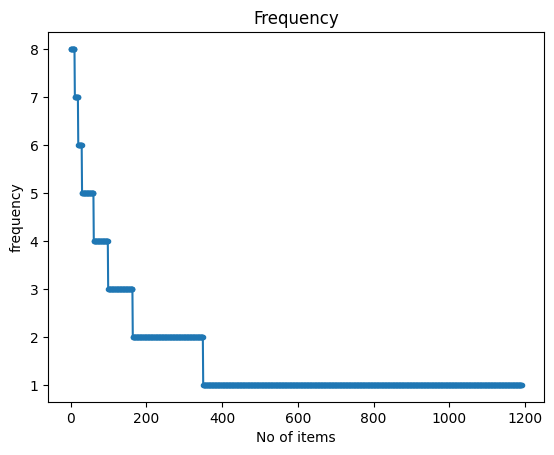

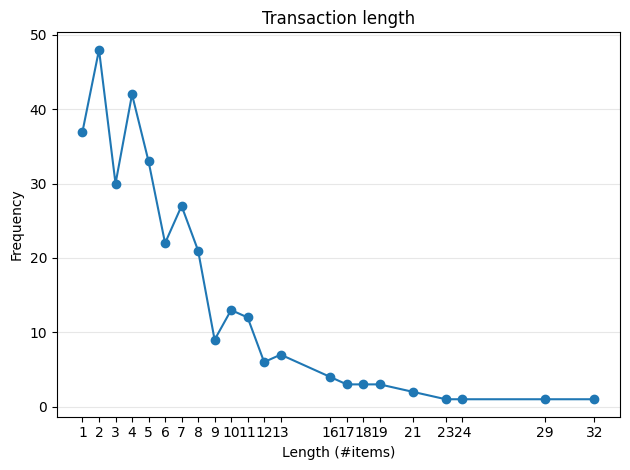

In [69]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 196
Number of items : 1534
Minimum Transaction Size : 1
Average Transaction Size : 12.918367346938776
Maximum Transaction Size : 66
Standard Deviation Transaction Size : 10.813987040023255
Variance in Transaction Sizes : 117.54201988487702
Sparsity : 0.9915786392783972


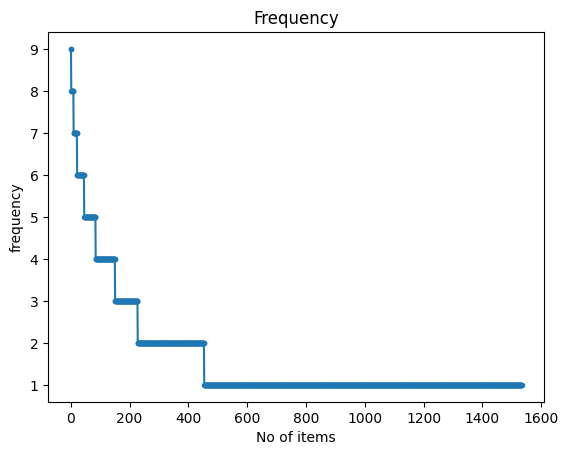

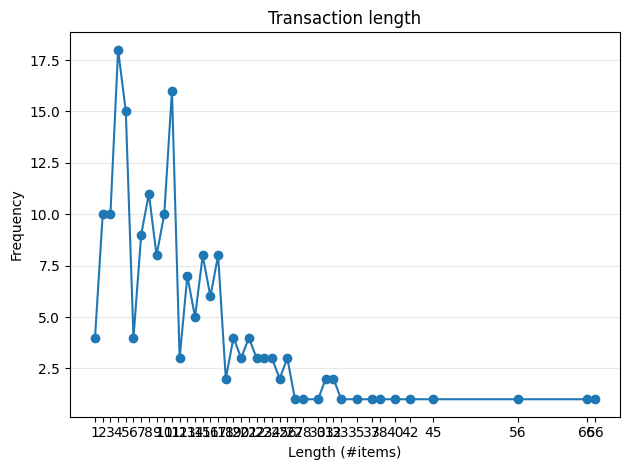

In [71]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_-1.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 317
Number of items : 2940
Minimum Transaction Size : 1
Average Transaction Size : 16.681388012618296
Maximum Transaction Size : 197
Standard Deviation Transaction Size : 22.259781119469036
Variance in Transaction Sizes : 497.0658866749191
Sparsity : 0.9943260584991094


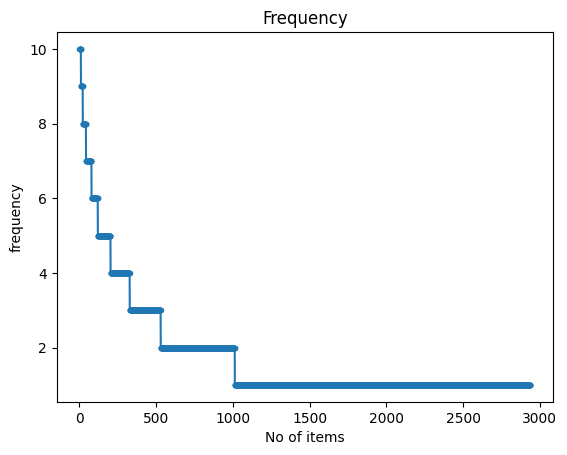

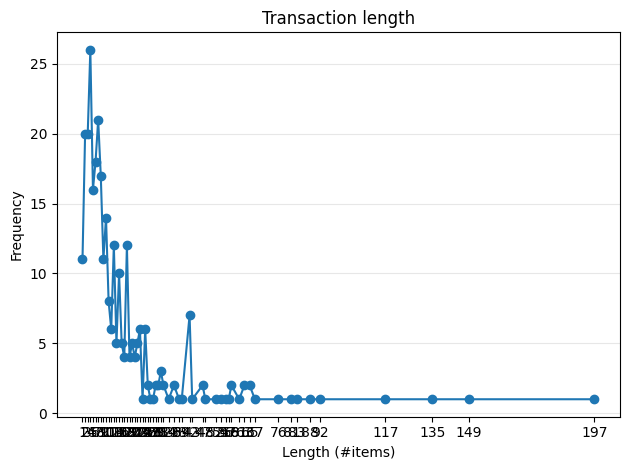

In [73]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_1.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [86]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_0= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_0))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 34
Runtime: 0.0037689208984375


In [87]:
obj1.save('freq_patterns_0_minSup6.txt') #save the patterns
frequentPatternsDF_0

,Patterns,Support
0,call,6
1,news,6
2,re,6
3,anything,6
4,already,6
5,out,6
6,btcusd,6
7,ethusd,6
8,ethusd\tbtcusd,6
9,pepeusd,6


In [88]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_-1.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neg_1= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neg_1))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 46
Runtime: 0.0


In [89]:
obj1.save('freq_patterns_-1_minSup6.txt') #save the patterns
frequentPatternsDF_neg_1

,Patterns,Support
0,retard,6
1,investment,6
2,seems,6
3,went,6
4,without,6
5,life,6
6,man,6
7,does,6
8,idiot,6
9,least,6


In [90]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_1.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_1= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_1))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 120
Runtime: 0.006698131561279297


In [91]:
obj1.save('freq_patterns_1_minSup6.txt') #save the patterns
frequentPatternsDF_1

,Patterns,Support
0,ever,6
1,months,6
2,end,6
3,actually,6
4,used,6
...,...,...
115,today,10
116,america,10
117,thanks,10
118,everyone,10


Assigning unique patterns for every category

In [92]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_0, frequentPatternsDF_neg_1, frequentPatternsDF_1]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
151    where       10
150  someone       10
149  country       10
155   always       10
148   pretty       10
..       ...      ...
64      take        6
61      debt        6
62      next        6
60      cash        6
59   anymore        6

[156 rows x 2 columns]
Number of patterns discarded: 44


In [94]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
data_tdm = count_vect.fit_transform(data['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

print(final_pattern_df)

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(data_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

    Patterns  Support
151    where       10
150  someone       10
149  country       10
155   always       10
148   pretty       10
..       ...      ...
64      take        6
61      debt        6
62      next        6
60      cash        6
59   anymore        6

[156 rows x 2 columns]


,00,000,01378,02,027,03,06,08,10,100,...,little,inflation,recently,whole,important,take,debt,next,cash,anymore
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> Exercise 17 (take home):
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, the trials will ran with k values of 500, 570, and 1000 since the k=1500 used from the master took too long when doing in this dataset, perhaps the value has already exceeded the patterns. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

#### FAE Top-K

In [172]:
# Answer Here
# FAE Top-K
from PAMI.frequentPattern.topk import FAE  as alg
kCount = np.array([500, 750, 1000])

for k in kCount:
    obj = alg.FAE(iFile='td_freq_db_0.csv', k=k)    
    obj.mine()
    obj.save(outFile=f'fae_topk_freq_patterns_0_({k}).txt')
    fae_patterns_df= obj.getPatternsAsDataFrame()
    print('\n')
    print('Runtime: ' + str(obj.getRuntime()))
    print('Memory (RSS): ' + str(obj.getMemoryRSS()))
    print('Memory (USS): ' + str(obj.getMemoryUSS()))
    print('Total No of patterns using k=' + str(k) + ': ' + str(len(fae_patterns_df)))
    print(fae_patterns_df)

 TopK frequent patterns were successfully generated using FAE algorithm.


Runtime: 26.416582822799683
Memory (RSS): 677535744
Memory (USS): 640770048
Total No of patterns using k=500: 500
                                              Patterns  Support
0                                                  now        8
1                                                   go        8
2                                                still        8
3                                                their        8
4                                                would        8
..                                                 ...      ...
495  jasmyusd cryptocurrency cap btcusd highlights ...        5
496      cryptocurrency cap btcusd highlights jasmyusd        5
497  prices cryptocurrency cap btcusd highlights tr...        5
498        cryptocurrency cap btcusd highlights prices        5
499        cryptocurrency cap btcusd highlights trends        5

[500 rows x 2 columns]
 TopK frequent patt

#### Max FP Growth

In [98]:
# Max FP Growth
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
minSup = np.array([3, 6, 9])

for val in minSup:
    obj = alg.MaxFPGrowth(iFile='td_freq_db_0.csv', minSup=val) 
    obj.mine()         
    
    obj.save(f'maxfp_freq_patterns_comp_graphics_({val}).txt') 
    
    maxfp_patterns_df= obj.getPatternsAsDataFrame() 
    print('Total No of patterns: ' + str(len(maxfp_patterns_df))) 
    print('Runtime: ' + str(obj.getRuntime()))
    print('Memory (RSS): ' + str(obj.getMemoryRSS()))
    print('Memory (USS): ' + str(obj.getMemoryUSS()))
    print(maxfp_patterns_df)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 138
Runtime: 0.00830078125
Memory (RSS): 2937663488
Memory (USS): 2932891648
       Patterns  Support
0         made         3
1    something         3
2         next         3
3         last         3
4        month         3
..          ...      ...
133        don         8
134        but         8
135      would         8
136         go         8
137        now         8

[138 rows x 2 columns]
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 28
Runtime: 0.002205371856689453
Memory (RSS): 2937663488
Memory (USS): 2932891648
                  Patterns  Support
0                    here         6
1   btcusd ethusd pepeusd         6
2                     out         6
3                 already         6
4                anything         6
5                      re         6
6                    news         6
7               

#### - Findings
Similar to the Master exercise, the FAE Top K shows some patterns to be repetitive at around **500th, 750th, and 1000th.** For this demonstration, we only did until the k=1000 since the algorithm runs for quite a long time beyond that. An example from the output at k=750 is shown below:
```
                                              Patterns  Support
0                                                  now        8
1                                                   go        8
2                                                still        8
3                                                their        8
4                                                would        8
..                                                 ...      ...
745       prices coinbase cap ethusd highlights trends        5
746              coinbase cap ethusd highlights prices        5
747              coinbase cap ethusd highlights trends        5
748                     cap ethusd highlights coinbase        5
749  prices jasmyusd cryptocurrency cap ethusd high...        5
```

As for the Max FP Growth, I noticed that at minimum support 9, it does not register any pattern. Maybe because of the smaller size of the dataset that it would not get any patterns higher that that compared to the Master. Here is the copied output at minimum support 9:

```
Total No of patterns: 0
Runtime: 0.0023238658905029297
Memory (RSS): 2937663488
Memory (USS): 2932891648
Empty DataFrame
Columns: [Patterns, Support]
Index: []
```

### 5.5 Dimensionality Reduction

In [173]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
data_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
data_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
data_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

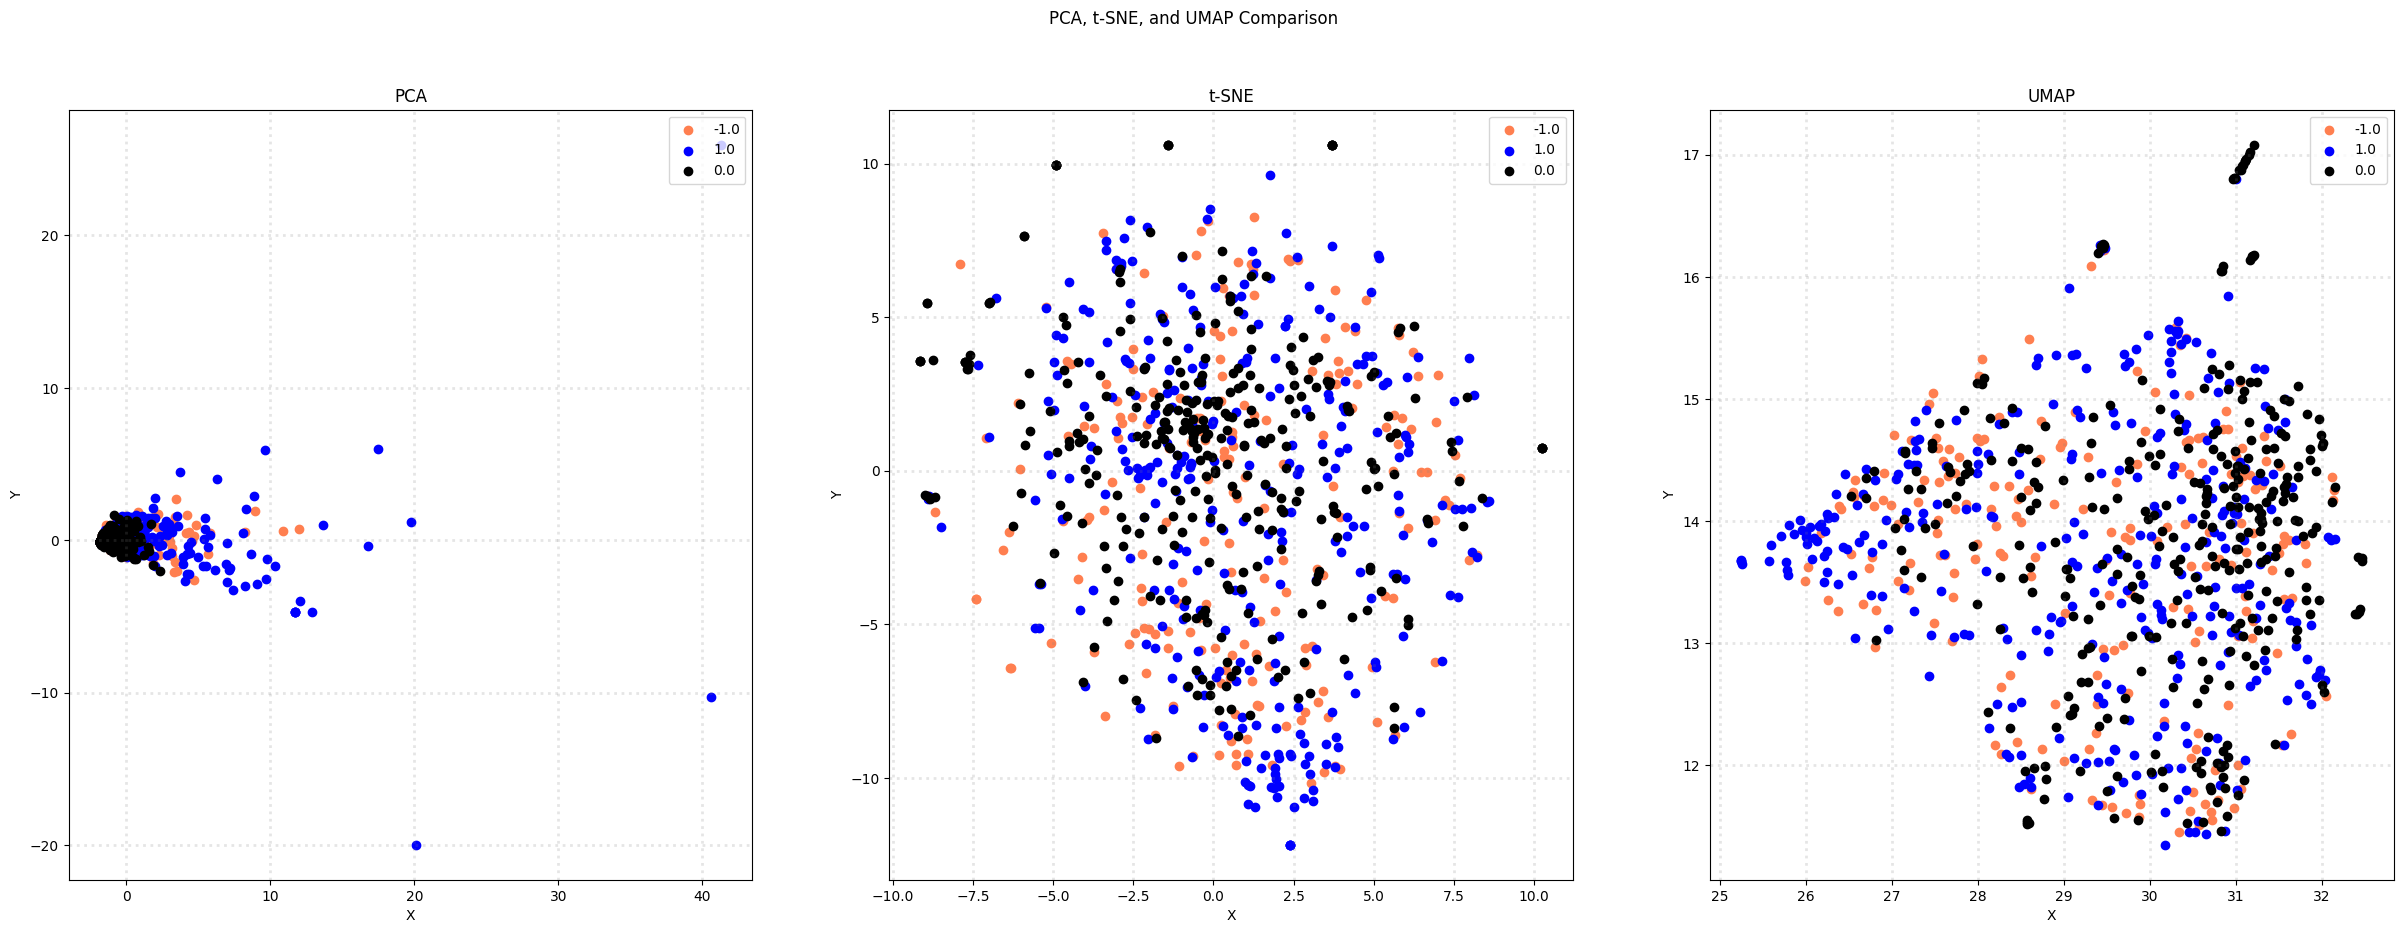

In [174]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, data_reduced, title):
    for c, category in zip(col, categories):
        xs = data_reduced[data['sentiment'] == category].T[0]
        ys = data_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], data_pca_tdm, 'PCA')
plot_scatter(axes[1], data_tsne_tdm, 't-SNE')
plot_scatter(axes[2], data_umap_tdm, 'UMAP')

plt.show()

#### With the augmented data

In [175]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
data_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
data_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
data_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

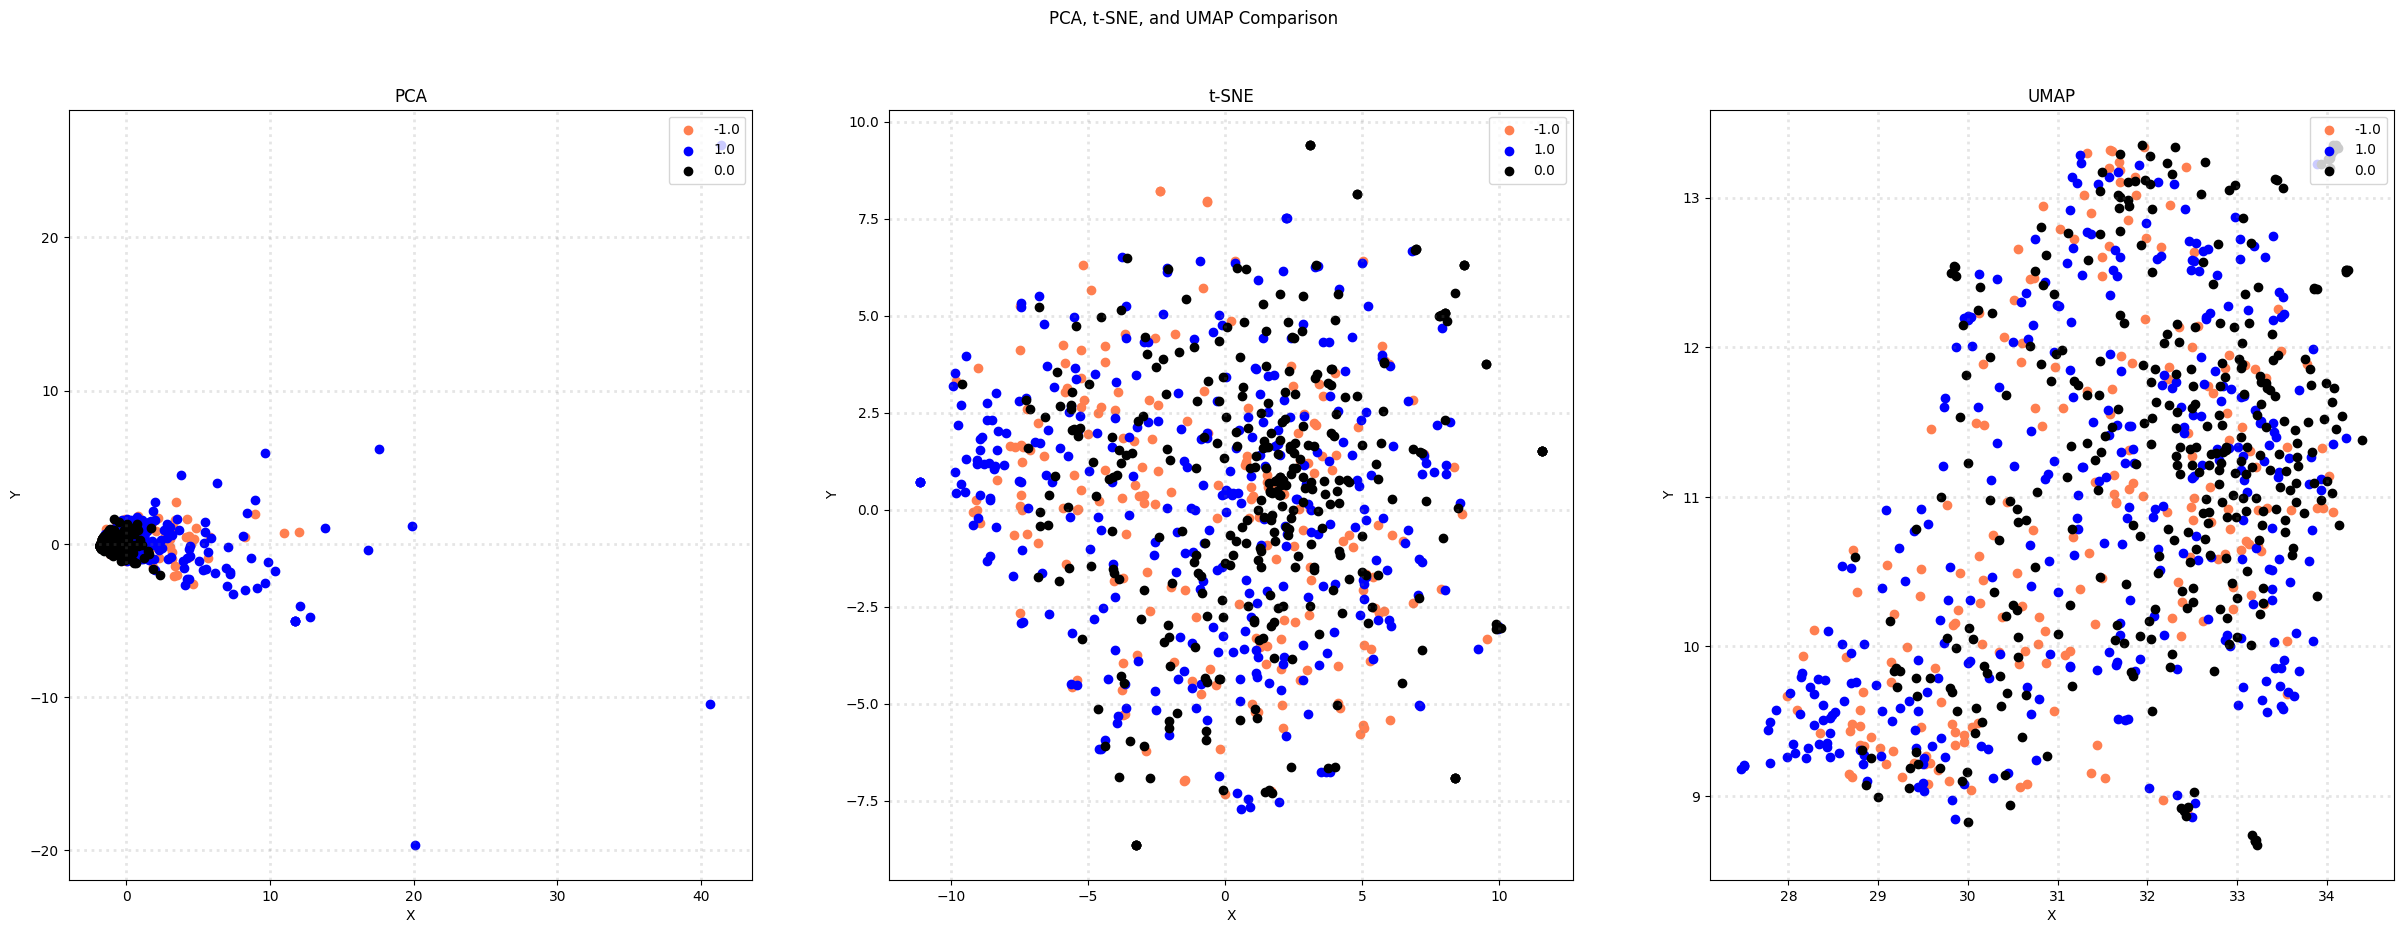

In [176]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, data_reduced, title):
    for c, category in zip(col, categories):
        xs = data_reduced[data['sentiment'] == category].T[0]
        ys = data_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], data_pca_aug, 'PCA')
plot_scatter(axes[1], data_tsne_aug, 't-SNE')
plot_scatter(axes[2], data_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [177]:
data_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
data_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
data_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

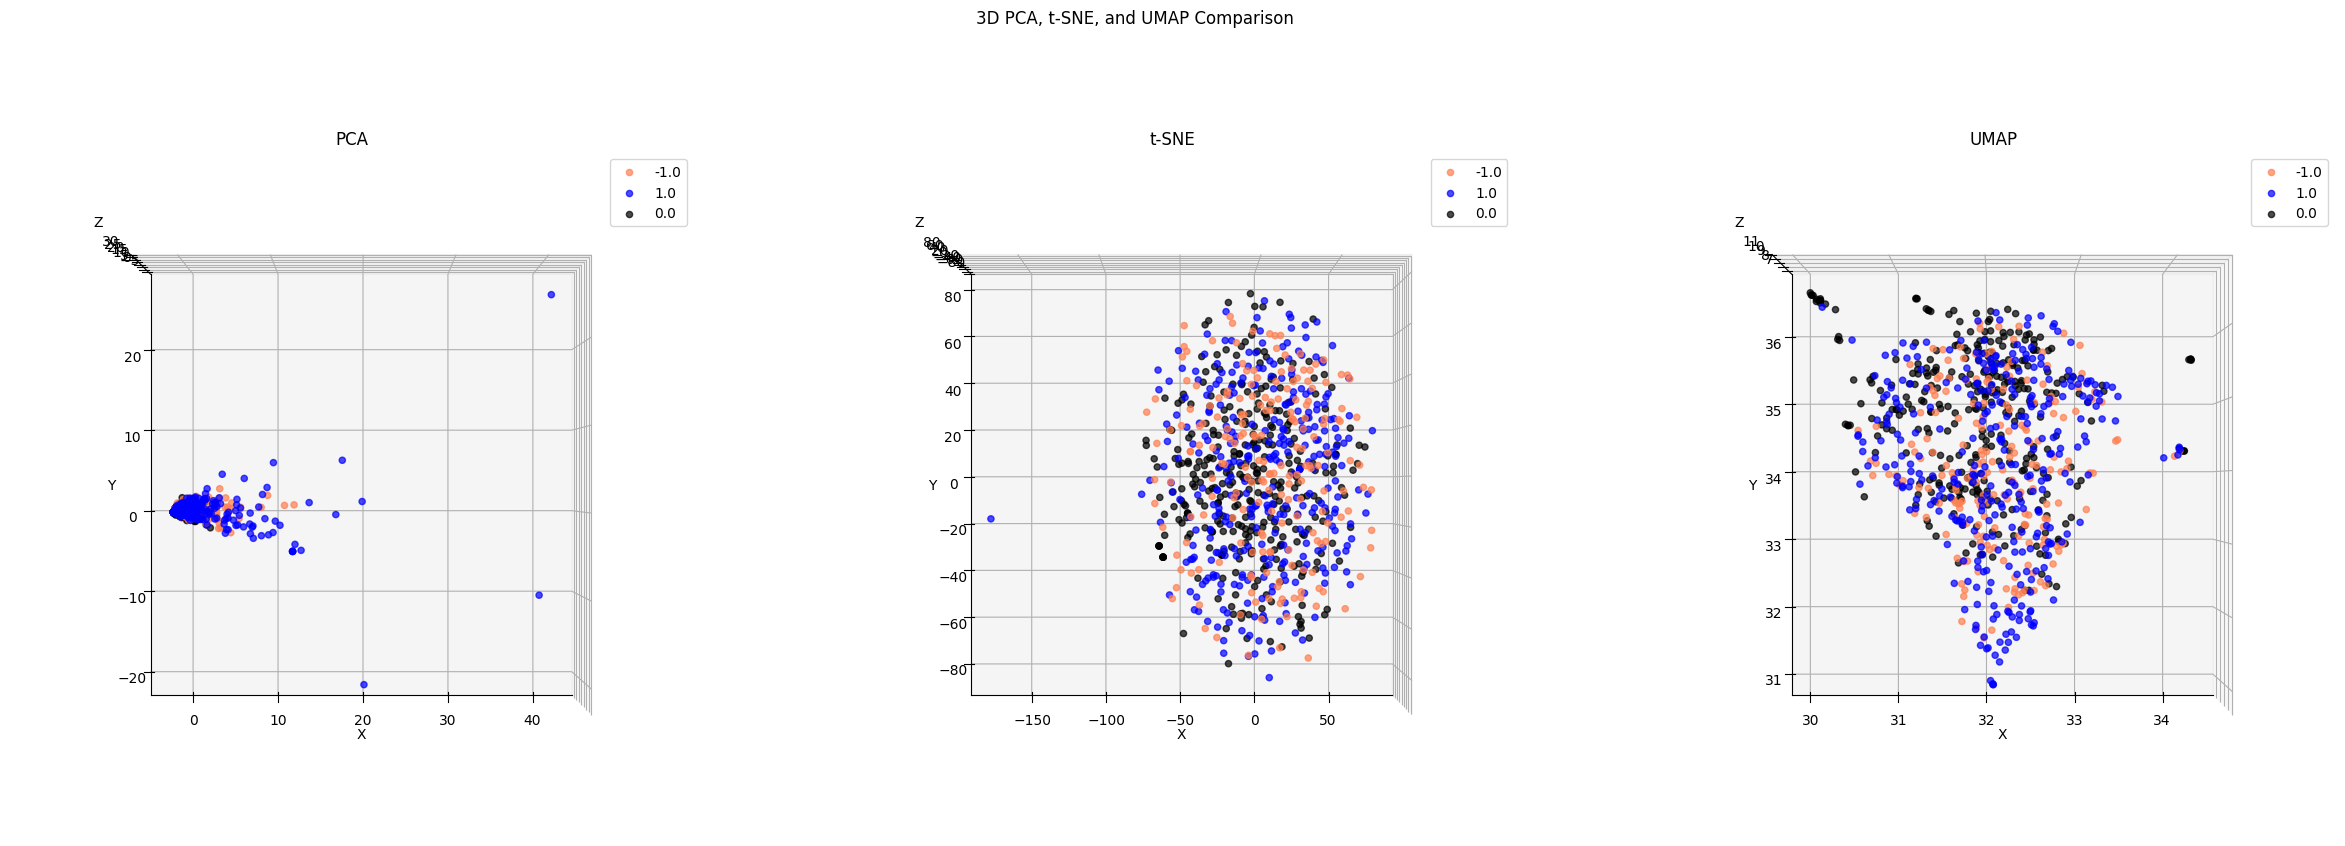

In [187]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Colors and categories (same as before)
col = ['coral', 'blue', 'black']
categories = data['sentiment'].unique() 

# Create 3D subplots for PCA, t-SNE, and UMAP
fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison')

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

def plot_scatter_3d(ax, data_reduced, title):
    for c, category in zip(col, categories):
        xs = data_reduced[data['sentiment'] == category].T[0]
        ys = data_reduced[data['sentiment'] == category].T[1]
        zs = data_reduced[data['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.7)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='best')
    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.3)

plot_scatter_3d(ax1, data_pca_aug, 'PCA')
ax1.view_init(elev=90, azim=270)

plot_scatter_3d(ax2, data_tsne_aug, 't-SNE')
ax2.view_init(elev=90, azim=270)

plot_scatter_3d(ax3, data_umap_aug, 'UMAP')
ax3.view_init(elev=90, azim=270)

plt.show()


#### - Findings

In the plots being executed, I observed that there's not much information we can get despite being plotted on the 3-axis other than some of the findings I listed below. I took a screenshot of these plots on different angles:

At **elev=0, azim=360:**
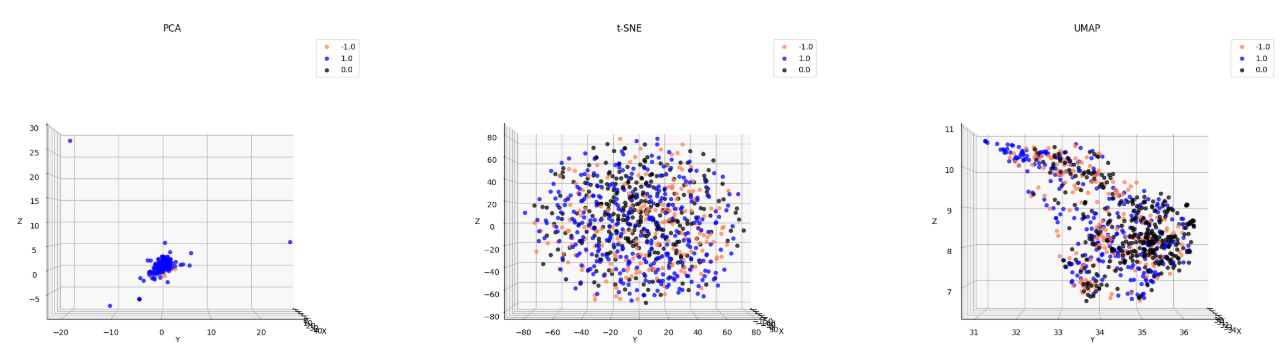
In this plot, the PCA plot somehow show that the sentiment `1` is more prominent than the other sentiments. As for the t-SNE and UMAP, all of the other sentiments seems to be mixed to each other, although the sentiment `1` in the UMAP shows to be slightly grouped at a corner, while sentiment `0` is somehow a bit clumped together but faintly enough.

A **elev=180, azim=360**
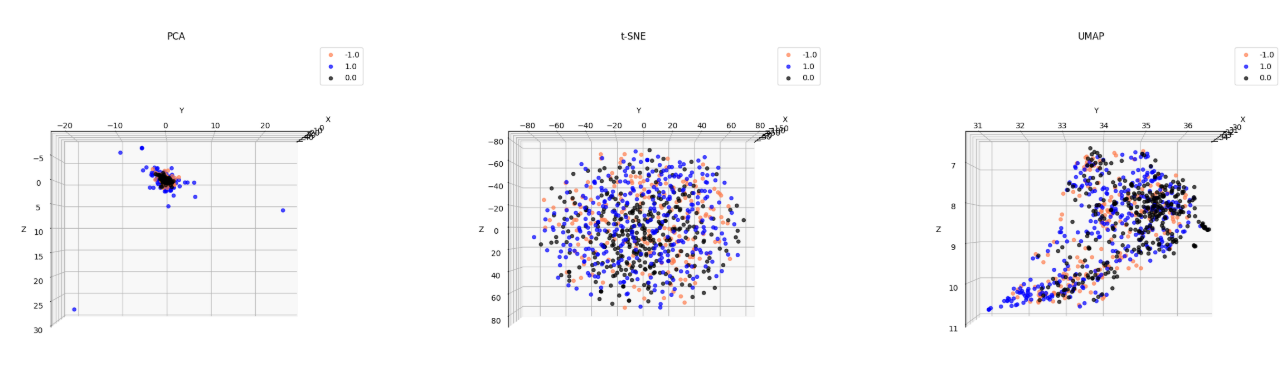
I tried to view the plots in this angle, we can see that the sentiment `0` is now showing more clearly than the rest of the sentiments in the PCA plot, however, the t-SNE and UMAP shows the same case as with the previous angle.

At **elev=90, azim=270**
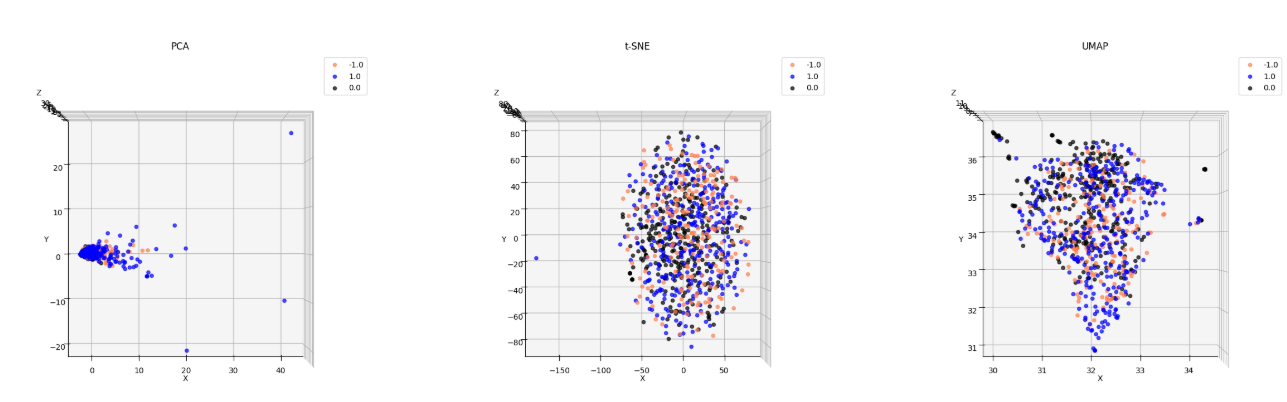
In this angle, I tried to view when changing the azimuthal at a different value. We can see here that the shape of the plot in the PCA is quite more elongated than the previous plots. In addition we can see in the UMAP that sentiments `0` and `1` are somehow slightly clumped in a particulat region but still most of them are mixed with each other.

Ulimately, the plot being demonstrated are not sufficient to show the effect of dimentionality reduction.

### 5.6 Discretization and Binarization

In [188]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [189]:
mlb = preprocessing.LabelBinarizer()

mlb.fit(data.sentiment)

data['bin_sentiment'] = mlb.transform(data['sentiment']).tolist()

### >>> Exercise 19 (take home):
Try to generate the binarization using the `sentiment_name` column instead. Does it work?

For this excercise, I introduced another column named `sentiment_name` to add a text category based on the sentiment values:

    -1: 'negative',
     0: 'neutral',
     1: 'positive'

From the demonstrated code below, we can see that it also works on the new category similar to the master excersise

In [194]:
mapping = {
    -1: 'negative',
     0: 'neutral',
     1: 'positive'
}

data['sentiment_name'] = data['sentiment'].map(mapping)

In [195]:
mlb = preprocessing.LabelBinarizer()

mlb.fit(data['sentiment_name'])
data['bin_sentiment_name'] = mlb.transform(data['sentiment_name']).tolist()

data

,type,subreddit,title,text,sentiment,tokenized_text,bin_sentiment,sentiment_name,bin_sentiment_name
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,"{on, retards, Calls}","[1, 0, 0]",negative,"[1, 0, 0]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,"{even, as, about, in, company, ever, make, a, ...","[0, 0, 1]",positive,"[0, 0, 1]"
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,"{Seeing, ticker., the, of, red, in, lots}","[0, 1, 0]",neutral,"[0, 1, 0]"
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,"{has, Torrente's, passion, Torrente., innovati...","[0, 0, 1]",positive,"[0, 0, 1]"
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,"{say, thank, didn’t, you., He}","[0, 1, 0]",neutral,"[0, 1, 0]"
...,...,...,...,...,...,...,...,...,...
842,comment,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,"{it, going, up, is, shoot, Invest, tomorrow, n...","[0, 1, 0]",neutral,"[0, 1, 0]"
843,comment,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.0,"{Where, this?, can, I, read}","[0, 1, 0]",neutral,"[0, 1, 0]"
844,post,stockstobuytoday,Analyst Recommendations,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,"{Analyst, Upgrades, [Stock, |, Nasdaq](), &, U...","[0, 1, 0]",neutral,"[0, 1, 0]"
845,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,"{on, my, so, sold, expect, denmark, declare, c...","[0, 1, 0]",neutral,"[0, 1, 0]"


# 6. Data Exploration

In [196]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[250]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[500]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[750]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [197]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Hey everyone, i was looking into a new company to the CSE Syntheia Corp and wanted to share some info on them\r\n\r\nThey use advanced AI to improve customer service, helping call centers and restaurants manage tasks more easily. Their solutions, like AgentNLP and OrderNLP, streamline communication, reduce repetitive work, and enhance the customer experience.\r\n\r\nUse cases:\r\n\r\nRestaurants: Syntheia can manage all incoming calls, ensuring guests have a smooth experience and reservations are handled efficiently.\r\n\r\nReal Estate Offices: Having a virtual receptionist means no calls are missed, and all property listings can be easily communicated to potential buyers.\r\n\r\nDoctors' Clinics: Syntheia responds to patient inquiries at any hour, booking appointments and providing essential guidance without delay.\r\n\r\nAnd many more + stuff in the works\r\n\r\nTLDR: \r\n\r\nSyntheia is changing the way businesses handle customer service by using smart AI tools to make communicati

In [198]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [199]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.158504
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\samue\AppData\Local\Temp\ipykernel_20868\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

### >>> Exercise 20 (take home):
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [139]:
# We retrieve 3 sentences for a random record
document_to_transform_4 = []
random_record_4 = data.iloc[data.sample(n=1).index[0]]
random_record_4 = random_record_4['text']
document_to_transform_4.append(random_record_4)

document_to_transform_5 = []
random_record_5 = data.iloc[data.sample(n=1).index[0]]
random_record_5 = random_record_5['text']
document_to_transform_5.append(random_record_5)

document_to_transform_6 = []
random_record_6 = data.iloc[data.sample(n=1).index[0]]
random_record_6 = random_record_6['text']
document_to_transform_6.append(random_record_6)

# Transform sentence with Vectorizers
document_vector_count_4 = count_vect.transform(document_to_transform_4)
document_vector_count_5 = count_vect.transform(document_to_transform_5)
document_vector_count_6 = count_vect.transform(document_to_transform_6)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_4_bin = binarize(document_vector_count_4)
document_vector_count_5_bin = binarize(document_vector_count_5)
document_vector_count_6_bin = binarize(document_vector_count_6)

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_4_5 = cosine_similarity(document_vector_count_4, document_vector_count_5, dense_output=True)
cos_sim_count_4_6 = cosine_similarity(document_vector_count_4, document_vector_count_6, dense_output=True)
cos_sim_count_5_6 = cosine_similarity(document_vector_count_5, document_vector_count_6, dense_output=True)

cos_sim_count_4_4 = cosine_similarity(document_vector_count_4, document_vector_count_4, dense_output=True)
cos_sim_count_5_5 = cosine_similarity(document_vector_count_5, document_vector_count_5, dense_output=True)
cos_sim_count_6_6 = cosine_similarity(document_vector_count_6, document_vector_count_6, dense_output=True)

# Print 
print("Cosine Similarity using count bw 4 and 5: %(x)f" %{"x":cos_sim_count_4_5})
print("Cosine Similarity using count bw 4 and 6: %(x)f" %{"x":cos_sim_count_4_6})
print("Cosine Similarity using count bw 5 and 6: %(x)f" %{"x":cos_sim_count_5_6})

print("Cosine Similarity using count bw 4 and 4: %(x)f" %{"x":cos_sim_count_4_4})
print("Cosine Similarity using count bw 5 and 5: %(x)f" %{"x":cos_sim_count_5_5})
print("Cosine Similarity using count bw 6 and 6: %(x)f" %{"x":cos_sim_count_6_6})

Cosine Similarity using count bw 4 and 5: 0.000000
Cosine Similarity using count bw 4 and 6: 0.235702
Cosine Similarity using count bw 5 and 6: 0.000000
Cosine Similarity using count bw 4 and 4: 1.000000
Cosine Similarity using count bw 5 and 5: 1.000000
Cosine Similarity using count bw 6 and 6: 1.000000


C:\Users\samue\AppData\Local\Temp\ipykernel_20868\1302583935.py:39: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\1302583935.py:40: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\1302583935.py:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\samue\AppData\Local\Temp\ipykernel_20868\1302583935.py:43: DeprecationWarning:

Conversion of an array with ndim > 0 t

#### - Findings

Similar to the Master excercise, it shows that text that are computed with the cosine similarity to itself has a value of 1 which mean that they are equal to each other, while for therms that are different to each other gets a value less than one. Those terms whose value depends on how relevant are they to each other.

# 7. Data Classification

In [200]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(data[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['sentiment'], test_size=0.3, random_state=42)

In [201]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
y_test

457    0.0
342   -1.0
280    1.0
275    1.0
843    0.0
      ... 
766    1.0
548    1.0
351    1.0
136   -1.0
834   -1.0
Name: sentiment, Length: 255, dtype: float64

In [203]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4823529411764706

Classification Report:
               precision    recall  f1-score   support

    negative     0.2857    0.3137    0.2991        51
     neutral     0.7234    0.3238    0.4474       105
    positive     0.4803    0.7374    0.5817        99

    accuracy                         0.4824       255
   macro avg     0.4965    0.4583    0.4427       255
weighted avg     0.5415    0.4824    0.4698       255



### >>> Exercise 21 (take home):

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [204]:
#Answer

# Split the data into training and testing sets (70% train, 30% test)
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, data['sentiment'], test_size=0.3, random_state=42)

In [205]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_aug_train, y_aug_train)

# Make predictions on the test set
y_aug_pred = nb_classifier.predict(X_aug_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

Accuracy: 0.47843137254901963

Classification Report:
               precision    recall  f1-score   support

    negative     0.3158    0.3529    0.3333        51
     neutral     0.6863    0.3333    0.4487       105
    positive     0.4694    0.6970    0.5610        99

    accuracy                         0.4784       255
   macro avg     0.4905    0.4611    0.4477       255
weighted avg     0.5280    0.4784    0.4692       255



### >>> Exercise 22 (take home):

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

#### - Findings

From the model outputs of both original TDM and augmented TDM, I observed that the augented TDM has worsen the accuracy of the model from **0.482** when using the original TDM to **0.478** when using the augmented TDM. This could be because that the augmented TDM has an added dimension to the data such that the model has a difficulty in classifying the data.

### Decision Tree Classifier

In [207]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.6235294117647059

Classification Report:
               precision    recall  f1-score   support

    negative     0.4103    0.3137    0.3556        51
     neutral     0.6695    0.7524    0.7085       105
    positive     0.6531    0.6465    0.6497        99

    accuracy                         0.6235       255
   macro avg     0.5776    0.5709    0.5713       255
weighted avg     0.6113    0.6235    0.6151       255



### >>> Exercise 23 (take home):

#### - Findings

Based from the outputs, it came to my surprise that the Decision Tree classifier performs well compared to the Naive Bayes from **0.478** to **0.623**. One reason I could think of is that Naive Bayes is also not good when it comes to high dimention of data. My hypothesis could be that in this dataset, the terms are much smaller compared to the Master which could be a reason that the Decision Tree still perfroms well.

### >>> Exercise 24 (take home):

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [208]:
## Split the data (already done above, but shown here for clarity)
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, data['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_aug_classifier = DecisionTreeClassifier(random_state=42)
dt_aug_classifier.fit(X_aug_train, y_aug_train)

# Predict and evaluate
y_aug_pred = dt_aug_classifier.predict(X_aug_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.6235294117647059

Classification Report:
               precision    recall  f1-score   support

    negative     0.3488    0.2941    0.3191        51
     neutral     0.6930    0.7524    0.7215       105
    positive     0.6633    0.6566    0.6599        99

    accuracy                         0.6235       255
   macro avg     0.5684    0.5677    0.5668       255
weighted avg     0.6126    0.6235    0.6171       255



#### - Findings

After perfomring the Decision Tree with the augmented data, I listed the following results for both Naive Bayes and Decision Trees form comparison

NB aug: 0.47843137254901963
DT aug: 0.6235294117647059

We can see that the Decision Tree is still more accurate that the Naive Bayes with the augmented data, this is quite expected considering from the previous experiments where DT is ahead. My reason is similar to that from Exercise 23, and since the DT's score is significantly higer than NB which makes it less likely for NB to reach.

### >>> Exercise 25 (take home):

In your opinion, how should one choose the best model for a given task, such as the classification example above?

#### - Findings

In my opinion, given the difference of model performance based on the dataset and task. I would suggest to try all possible models first before choosing the best one for your purpose.

# 8. Generate TF-IDF

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
vectorizer.get_feature_names_out()


X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X_df

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 9. Naive Bayes Implementation

## Using Gaussian NB with TF-IDF

In [241]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_dense = X.toarray()

y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5058823529411764

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.30      0.39      0.34        36
         0.0       0.85      0.32      0.47        68
         1.0       0.51      0.76      0.61        66

    accuracy                           0.51       170
   macro avg       0.55      0.49      0.47       170
weighted avg       0.60      0.51      0.50       170



## Multinomial NB with Augmented Pattern Word Frequency

In [242]:
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, data['sentiment'], test_size=0.3, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_aug_train, y_aug_train)

y_aug_pred = nb_classifier.predict(X_aug_test)

print("Accuracy:", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

Accuracy: 0.47843137254901963

Classification Report:
               precision    recall  f1-score   support

    negative     0.3158    0.3529    0.3333        51
     neutral     0.6863    0.3333    0.4487       105
    positive     0.4694    0.6970    0.5610        99

    accuracy                         0.4784       255
   macro avg     0.4905    0.4611    0.4477       255
weighted avg     0.5280    0.4784    0.4692       255



#### - Findings

With the two models demonstrated above, I observed that the Gaussin Naive Bayes using the TF-IDF is better in terms of accuracy compared to the Multinomial NB from our previous exercises.